# Neuro Data Analysis in Python: Problem Set 3

This is the third problem set. It has 5 problems, worth a total of 49 points. It is due before class (i.e. by 10:59 AM) on 11/2/2018. For late policy please see [the syllabus](https://github.com/alexhuth/ndap-fa2018/blob/master/README.md#late-homework--extension-policy). Partial credit will be awarded for partially correct solutions.


## Homework submission

When you've finished, rename the notebook file to `ndap-problem_set_3-YOUREID.ipynb`. For example, if your EID is `ab12345`, you should call it `ndap-problem_set_3-ab12345.ipynb`. Then upload your completed problem set to canvas.

In [178]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt

# Problem 1. (7 pts)
Solve each plotting problem for 1 point.

In [381]:
# run this cell to create the dataset you'll be plotting
a = np.linspace(0, 4 * np.pi, 50)
b = np.cos(a)

In [ ]:
# create a line plot with a on the x-axis and b on the y-axis (1 pt)

### YOUR CODE HERE ###

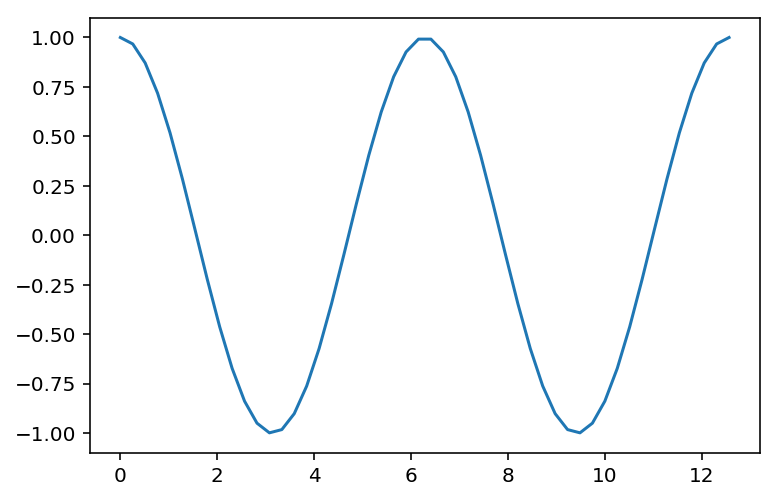

In [353]:
# it should look like this:

In [1]:
# again plot a vs. b, but this time use small dots (.) connected by lines (1 pt)

### YOUR CODE HERE ###

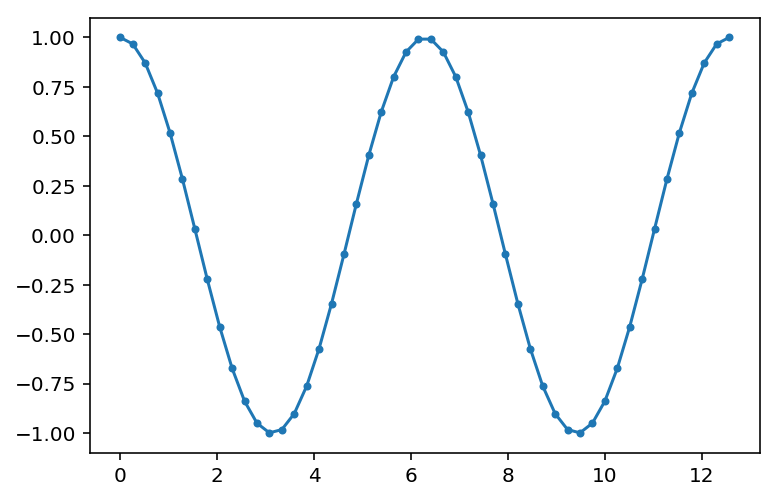

In [354]:
# it should look like this:

In [ ]:
# plot a vs. b using red dots (and no connecting line) (1 pt)

### YOUR CODE HERE ###

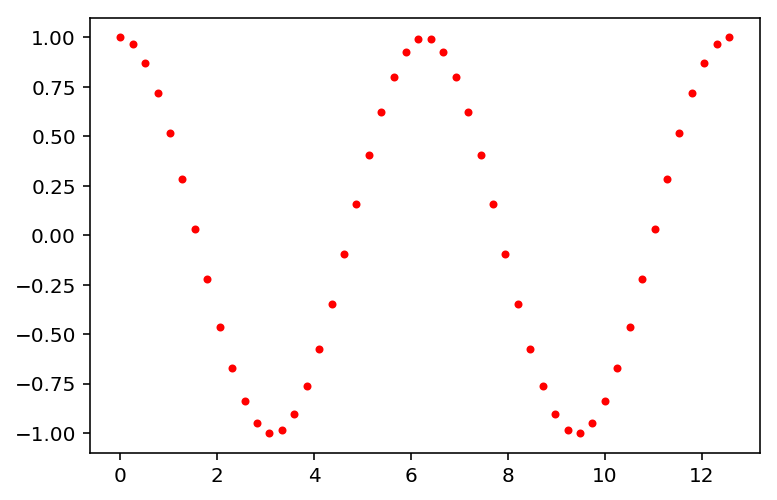

In [355]:
# it should look like this:

In [ ]:
# use plt.bar to create a bar plot of the values in b, where the left edge of each bar is at a (1 pt)

### YOUR CODE HERE ###

<BarContainer object of 50 artists>

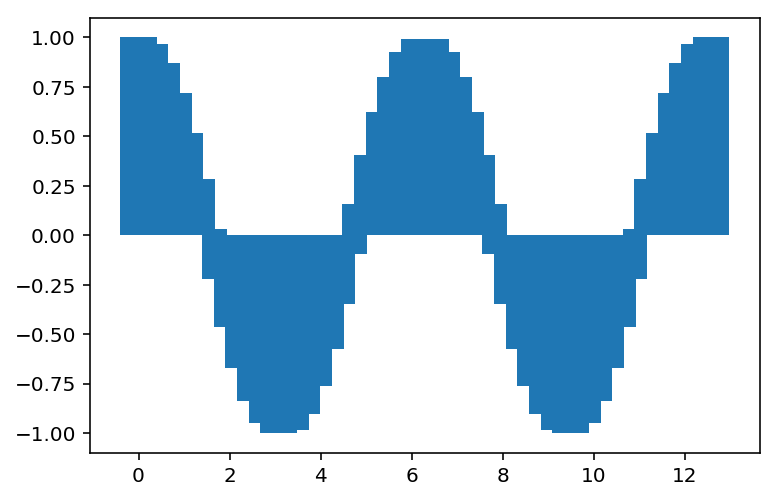

In [360]:
# it should look like this:

In [ ]:
# fix the bar plot by setting the width of each bar to 0.2 (1 pt)

### YOUR CODE HERE ###

<BarContainer object of 50 artists>

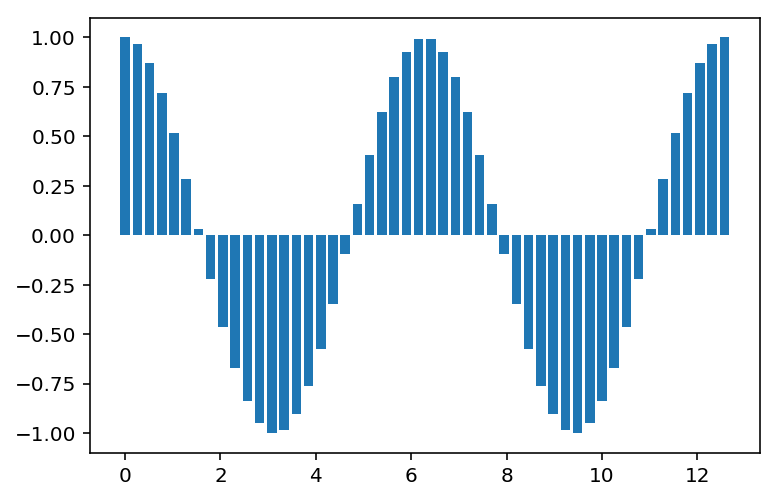

In [366]:
# it should look like this:

In [ ]:
c = np.sin(a[:,np.newaxis] * a)
print(c.shape)

# c is a 50 x 50 matrix
# use plt.matshow to make a raster plot of c (1 pt)
### YOUR CODE HERE ###

# and add a colorbar
### YOUR CODE HERE ###

(50, 50)


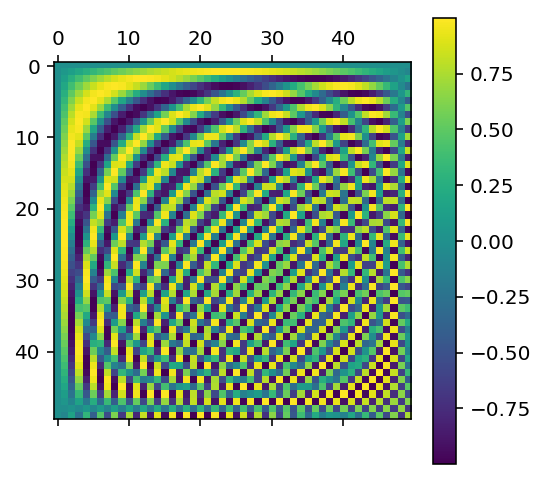

In [369]:
# it should look like this:

In [ ]:
# create a raster plot using the colormap plt.cm.RdBu (1 pt)
# include a colorbar!

### YOUR CODE HERE ###

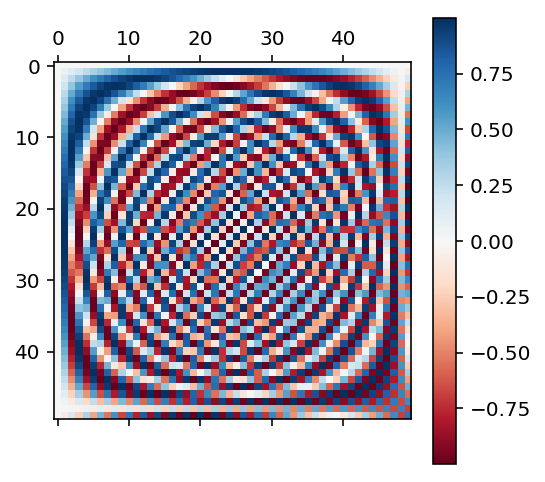

In [380]:
# it should look like this:

# Problem 2. (11 pts)


In [382]:
# load the neurophysiology data
data_file = np.load('ps3_neural_data.npz')
stimulus = data_file['stim'].astype(float)
response = data_file['resp'].astype(float)

`stimulus` is a 23 x 104000 matrix that tells you when the sound stimuli were presented. Each of the 23 rows corresponds to a different type of stimulus (the first one is a noise burst, the next 21 are tone pips at different frequencies, and the last one is another noise burst). The 104000 columns each correspond to one time bin. Each time bin is 5 milliseconds long.

In [180]:
print(stimulus.shape)

(23, 104000)


`response` is a 16 x 104000 matrix that tells you how many spikes were recorded from each recording site during each 5 millisecond bin. Neural responses were recorded simultaneously from 16 sites.

In [181]:
print(response.shape)

(16, 104000)


## a. (1 pt)
Use `plt.matshow` to show the first 500 timepoints (i.e. first 500 columns) of the `stimulus` matrix. Use the `aspect` parameter to control how tall or wide the plot should be (using an aspect of around 2 works well).

In [2]:
### YOUR CODE HERE ###

## b. (3 pts)
Next, you're going to compute the tuning curve for each recording site by finding the average spiking rate while each stimulus is being played. For responses from one recording site (one row of `response`) and one of the stimuli (one row of `stimulus`), extract the response timepoints where `stimulus` is equal to 1, then compute their mean. Do this for every response and every stimulus, putting the values into a 23 x 16 matrix called `tuning_curves`.

In [ ]:
tuning_curves = np.zeros((len(stimulus), len(response)))

for si in range(len(stimulus)):
    for ri in range(len(response)):
        tuning_curves[si,ri] = ### YOUR CODE HERE ###

**Bonus (+1 pt):** compute `tuning_curves` in one expression using the dot product `np.dot`.

In [ ]:
### YOUR (BONUS) CODE HERE ###

In [389]:
print(tuning_curves.shape)

(23, 16)


## c. (1 pt)
Use `plt.matshow` to make a raster plot of the tuning curves. Use `plt.colorbar` to show a colorbar as well.

In [3]:
### YOUR CODE HERE ###

## d. (1 pt)
Use `plt.plot` to plot the tuning curve for the last recording site (column 15 from `tuning_curves`). Trim off the responses to the first and last stimuli before plotting.

In [4]:
### YOUR CODE HERE ###

## e. (5 pts)
Use `plt.subplot` to make a 4x4 grid of plots showing the tuning curve for each of the 16 recording sites (each row of `tuning_curves`). Read the documentation for `plt.subplot` (remember the question mark!) to figure out how to call it. Set the y-axis limits to the same (0 to 0.25) for all the subplots.

In [ ]:
for ii in range(16):
    plt.subplot(### YOUR CODE HERE ###)
    ### YOUR CODE HERE ###

# Problem 3. (11 pts)

Next you're going to use this data to make a [peri-stimulus time histogram](https://en.wikipedia.org/wiki/Peristimulus_time_histogram) for each recording site. It will look something like this:
<img src='https://camo.githubusercontent.com/d192202c1e1249671bd81fc8a8fcb2e208334005/68747470733a2f2f7261772e6769746875622e636f6d2f6c696265727479682f6973696e672d6d6f64656c2f6d61737465722f696d616765732f736f756e645f63726f7373636f72722e706e67'>

In [397]:
# first we need to find the actual stimulus start times. just run this bit
stim_start_freqs, stim_start_times = np.nonzero(np.diff(stimulus, axis=1) > 0)

# unique_start_times has the index for each time a sound started playing
unique_start_times = np.unique(stim_start_times) - 3
print(unique_start_times.shape)
print(unique_start_times[:10])

(1040,)
[ 49 149 249 349 449 549 649 749 849 949]


## a. (3 pts)
Now you're going to compute the PSTH for one recording site (the last one). To do this you're going to first create a variable called `total_psth` to hold the thing. Then you're going to iterate through all the `unique_start_times` and for each one, pull out the responses from 40 time points before the start time to 40 time points after. Add this vector to `total_psth`. Finally you need to normalize `total_psth` by the total number of stimuli to get the average response to each stimulus.

In [191]:
psth_before = 40
psth_after = 40

total_psth = np.zeros( ### YOUR CODE HERE ### )
for s in unique_start_times:
    ### YOUR CODE HERE ###

total_psth /= ### YOUR CODE HERE ###

## b. (3 pts)
Next create a bar plot from `total_psth`. Set the x-location of each bar (using `np.arange`) so that the numbers count up and down from $t=0$ at the stimulus start time (i.e. the x-axis should go from -200 to 200). Set the width of each bar to 5, and make them a pleasing color.

Use `plt.vlines` to add a black vertical line at $t=0$. Use `plt.xlabel` to add a meaningful label to the x-axis, and use `plt.ylabel` to add a meaningful label to the y-axis. Use `plt.ylim` and `plt.xlim` to set nice-looking limits.

In [6]:
### YOUR CODE HERE ###

## c. (1 pts)
Now compute the PSTH for each of the 16 recording sites using the same technique as above. First create a matrix `all_psths` that is (number of responses) x (length of PSTH). Then compute each PSTH, storing the results in that matrix.

In [411]:
psth_before = 40
psth_after = 40

all_psths = np.zeros(### YOUR CODE HERE ###)
### YOUR CODE HERE ###
    
# normalize by the number of stimuli
all_psths /= ### YOUR CODE HERE ###

## d. (4 pts)
Create a 4x4 grid of PSTH plots using `plt.subplot`. Make each one as nice looking as your plot for **(b)** (though you don't need `xlabel` and `ylabel` for every subplot--set `xlabel` only for the ones on the bottom and `ylabel` only for the ones on the left side!).

In [ ]:
plt.figure(figsize=(12,12))
### YOUR CODE HERE ###

# Problem 4. (9 points)
The last thing we're going to do with this dataset is use statistical tests to see which recording sites are responding signifincantly to each stimulus. These binary neural responses work nicely with a binomial model, so we'll use the binomial test. Don't worry about implementing your own, we will be using `binom_test` from `scipy.stats`. 

But before we can work with the neural data, we first need to address an important issue: correction for multiple comparisons using the Bonferroni method.

In [247]:
from scipy.stats import binom_test

## a. (2 pts)
First let's generate a fake dataset with 1000 different binary response timecoureses with 360 time points each, all with response rates exactly equal to 10%. Set `fake_q` to the response rate you want, then use `np.random.rand` to create a 360 x 1000 matrix and binarize it using your `fake_q`, storing the result in `fake_data`.

In [415]:
fake_q = ## YOUR CODE HERE ###
fake_data = ### YOUR CODE HERE ###

## b. (1 pt)
Next, find the total number of spikes for each of the 1000 response timecourses. It should be around 36 for most of them.

In [ ]:
fake_means = ### YOUR CODE HERE ###
print(fake_means.shape)
print(fake_means[:10])

## c. (3 pts)
Do a binomial test on each one to get a p-value for the binomial test that the rate is different from 10% (either lower or higher). Use the function `binom_test` with proper settings for parameters `x`, `n`, and `p` (what we call $q$) for each of the 1000 response timecourses. (You should use a list comprehension surrounded by `np.array(...)`.)

In [ ]:
fake_pvals = ### YOUR CODE HERE ###
print(fake_pvals[:10])

## d. (1 pt)
Find all the "significant" tests according to traditional criteria (i.e. where the p-value is less than 0.05). `fake_signif` should be `True` for each responses where `fake_pvals` is smaller than 0.05, and `False` for each where it's greater.

In [ ]:
fake_signif = ### YOUR CODE HERE ###

# how many are there?
print(fake_signif.sum())

Lots of these tests come out significant, even though we _know_ they shouldn't be. We tested whether the response rate for each of our 1000 fake experiments was "significantly" different from 10%, but they were all generated using a rate of 10%! What gives?

It comes down to the $p$-value and how we define "significance". Remember that the $p$-value is how often an experiment with _no actual effect_ would yield a result at least as extreme as what is observed. Since we defined a $p$-value threshold of 0.05 (standard in the field), we should expect that about 5% of experiments should be "significant" at the 0.05 level. What do we do about this?

## Correcting for multiple statistical tests
If you run many statistical tests you shouldn't use the same significance threshold that you would use on a single test. The simplest solution to this problem is [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction). With Bonferroni you change the significance threshold so that the probability of seeing _any_ significant result across all of your tests is less than some value. The probability of any test being significant by chance is called the "family-wise error rate" (FWER). 

## e. (1 pt)
Bonferroni correction is accomplished by simply dividing your significance threshold by the number of tests. Do that here.

In [ ]:
bonferroni_threshold = ### YOUR CODE HERE ###
print(bonferroni_threshold)

## f. (1 pt)
The number of significant tests should probably be zero now. Running this whole analysis there should only be a 5% change of having one or more significant results. Compute the significance of each test using your new threshold.

In [ ]:
fake_signif_bonferroni = ### YOUR CODE HERE ###
print(fake_signif_bonferroni.sum())

# Problem 5. (11 points)

Use a binomial test to determine whether each recording channel responded significantly to each of the stimuli.

## a. (2 pts)
Compute the background spiking rate for each of the 16 recording channels (i.e. the average response while there is no stimulus). Do this by first finding all the timepoints where none of the stimuli are on and storing in `no_stim` (here it can be nice to use the negation operator `~`, which flips `True` and `False`, e.g. `~my_arr`). Then select those `no_stim` timepoints from the responses, and find the mean response in each channel.

In [417]:
no_stim = ### YOUR CODE HERE ###
no_stim_avg_response = ### YOUR CODE HERE ###
print(no_stim_avg_response)

[0.01503972 0.01634615 0.01536371 0.0132107  0.0180602  0.01986831
 0.02114339 0.02630644 0.01649247 0.0235786  0.0180811  0.0208612
 0.02761288 0.0228888  0.01884406 0.02520903]


## b. (3 pts)
Next, use binomial tests to compare the spiking rate of each recording site during each stimulus with the background rate. This will look similar to your tuning curve calculation from problem 2, but will also involve `binom_test`. For each stimulus and each recording site, you will need to find the total number of spikes and total number of timepoints, and then use `binom_test` to compare those values to the background rate (in `no_stim_avg_response`).

In [332]:
stim_response_pvals = np.zeros((len(stimulus), len(response)))

for si in range(len(stimulus)):
    for ri in range(len(response)):
        ### YOUR CODE HERE ###

## c. (1 pt)
Create a raster plot showing which stimuli elicited significant responses from each of the recording sites. Here define significance as having a p-value less than 0.05 in the binomial test. Use `plt.matshow` on the resulting binary matrix.

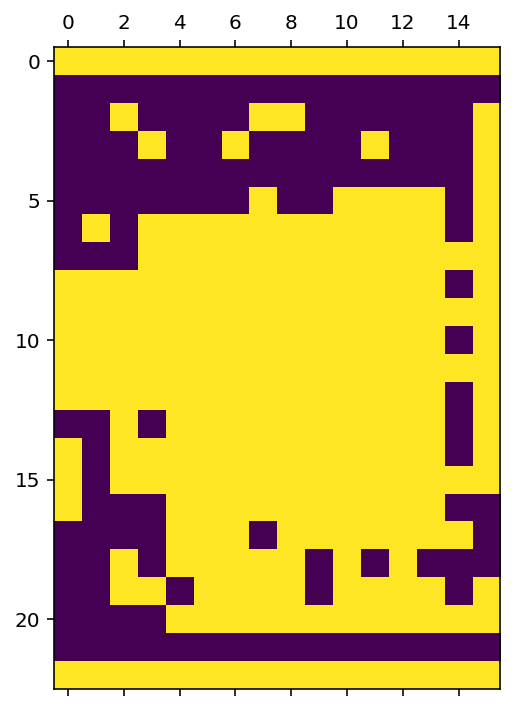

In [333]:
### YOUR CODE HERE ###

## d. (2 pts)
From problem 4 you know that the significance threshold of p < 0.05 is problematic when we're doing lots of tests: some of them will probably come out positive just by chance! Let's use the Bonferroni method to adjust the significance threshold.

First compute the total number of tests that we're doing (the number of stimuli multiplied by the number of responses).

In [420]:
total_tests = ### YOUR CODE HERE ###
print(total_tests)

368


Then compute the Bonferroni-corrected significance threshold.

In [335]:
bonferroni_threshold = ### YOUR CODE HERE ###
print(bonferroni_threshold)

0.0001358695652173913


Finally, make a raster plot (like part **(c)**) showing which tests are significant using this more stringent threshold.

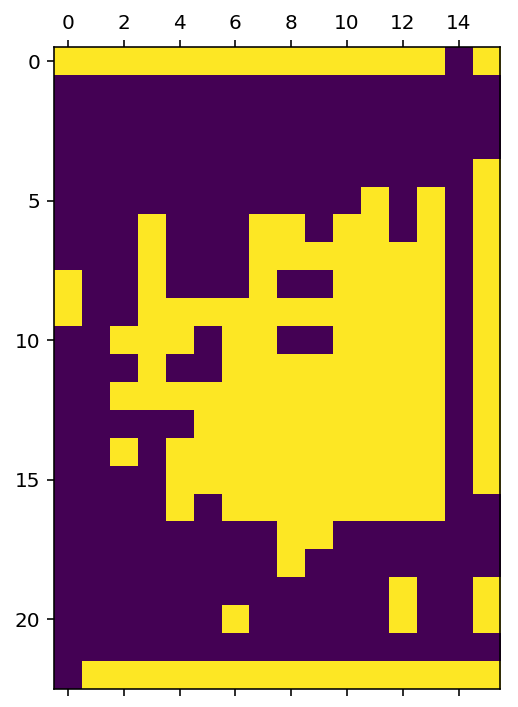

In [336]:
### YOUR CODE HERE ###

## e. (3 pts)
Finally let's put it all together in a nice-looking plot. Here, use `plt.matshow` to make a raster plot of the `tuning_curves` from problem 2. Then use `plt.spy` to add markers showing which responses are significant (you'll need to use the `marker` parameter, and probably `color` and `markersize`). Then add a colorbar and label your axes. Make it look nice!

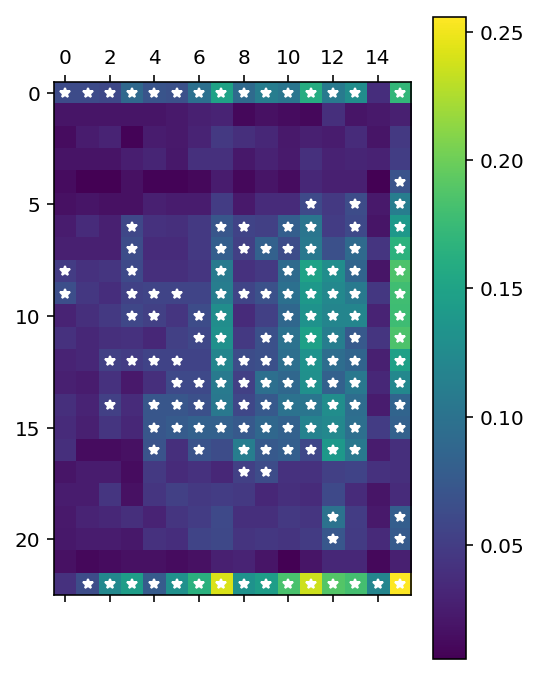

In [419]:
### YOUR CODE HERE ###